In [0]:
#!pip install keras
#!pip install -q pydot
#!pip install graphviz 
#!apt-get install graphviz

In [0]:
from sklearn.datasets import make_circles
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"]="2"

In [0]:
#   plot the data on a figure
def plot_data(pl, X, y):
    # plot class where y==0
    pl.plot(X[y==0, 0], X[y==0,1], '*', alpha=0.5)
    # plot class where y==1
    pl.plot(X[y==1, 0], X[y==1,1], '^', alpha=0.5)
    pl.legend(['0', '1'])
    return pl

In [0]:
#   Common function that draws the decision boundaries
def plot_decision_boundary(model, X, y):

    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    # make prediction with the model and reshape the output so contourf can plot it
    c = model.predict(ab)
    Z = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    # plot the contour
    plt.contourf(aa, bb, Z, cmap='bwr', alpha=0.2)
    # plot the moons of data
    plot_data(plt, X, y)

    return plt

In [0]:
# Generate some data blobs.  Data will be either 0 or 1 when 2 is number of centers.
# X is a [number of samples, 2] sized array. X[sample] contains its x,y position of the sample in the space
# ex: X[1] = [1.342, -2.3], X[2] = [-4.342, 2.12]
# y is a [number of samples] sized array. y[sample] contains the class index (ie. 0 or 1 when there are 2 centers)
# ex: y[1] = 0 , y[1] = 1

X, y = make_circles(n_samples=1000,factor=.6, noise=0.1, random_state=42)

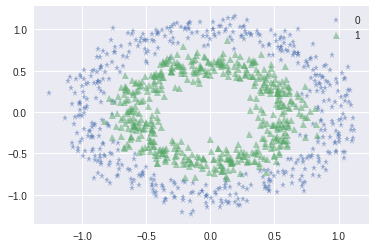

In [7]:
pl = plot_data(plt, X, y)

In [0]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [0]:
#Create the Keras Model
from keras.models import  Sequential
from keras.layers import  Dense
from keras.optimizers import  Adam

In [0]:
#Simple Sequential Model
model = Sequential()

In [0]:
model.add(Dense(1,input_shape=(2,),activation="sigmoid"))

In [0]:
#Compile the model. Minimize Crossentropy for binary. Maximize for accuracy
model.compile(Adam(lr=0.05),"binary_crossentropy",metrics=["accuracy"])

In [42]:
#Fit the model data with the data from make_blobs. Make 100 cycles through the data
model.fit(X_train, y_train, epochs=100,verbose=2)

Epoch 1/100
 - 0s - loss: 0.7212 - acc: 0.5257
Epoch 2/100
 - 0s - loss: 0.6968 - acc: 0.4571
Epoch 3/100
 - 0s - loss: 0.6950 - acc: 0.5471
Epoch 4/100
 - 0s - loss: 0.6966 - acc: 0.4514
Epoch 5/100
 - 0s - loss: 0.6952 - acc: 0.5243
Epoch 6/100
 - 0s - loss: 0.6943 - acc: 0.5371
Epoch 7/100
 - 0s - loss: 0.6942 - acc: 0.5229
Epoch 8/100
 - 0s - loss: 0.6941 - acc: 0.5643
Epoch 9/100
 - 0s - loss: 0.6952 - acc: 0.5357
Epoch 10/100
 - 0s - loss: 0.6940 - acc: 0.5086
Epoch 11/100
 - 0s - loss: 0.6950 - acc: 0.5171
Epoch 12/100
 - 0s - loss: 0.6962 - acc: 0.4371
Epoch 13/100
 - 0s - loss: 0.6937 - acc: 0.5643
Epoch 14/100
 - 0s - loss: 0.6946 - acc: 0.5571
Epoch 15/100
 - 0s - loss: 0.6962 - acc: 0.4700
Epoch 16/100
 - 0s - loss: 0.6954 - acc: 0.5271
Epoch 17/100
 - 0s - loss: 0.6950 - acc: 0.5214
Epoch 18/100
 - 0s - loss: 0.6937 - acc: 0.5257
Epoch 19/100
 - 0s - loss: 0.6952 - acc: 0.4743
Epoch 20/100
 - 0s - loss: 0.6950 - acc: 0.5314
Epoch 21/100
 - 0s - loss: 0.6950 - acc: 0.5300
E

In [43]:
#Get loss and accuracy on test data
eval_result = model.evaluate(X_test, y_test)


300/300 [==============================] - 0s 196us/step


In [44]:
#Print Test Accuracy
print("\n\n Test Loss:", eval_result[0],"Test accuracy:",eval_result[1])



 Test Loss: 0.6964440401395162 Test accuracy: 0.5233333341280619


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

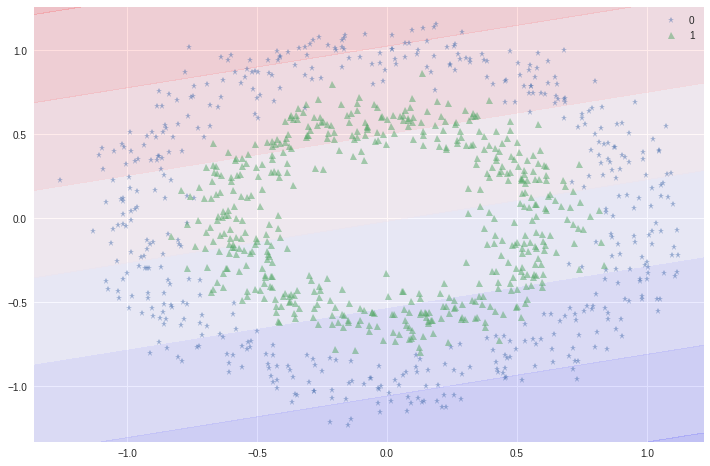

In [45]:
plot_decision_boundary(model, X, y)

# Adding Hidden Layers to **Model**

In [0]:
# New Model to Handle non-linearity in data

In [0]:
model = Sequential()

In [0]:
model.add(Dense(4,input_shape=(2,),activation="tanh"))

In [0]:
model.add(Dense(4,activation="tanh"))

In [0]:
model.add(Dense(1,activation="sigmoid"))

In [0]:
#Compile the model. Minimize Crossentropy for binary. Maximize for accuracy
model.compile(Adam(lr=0.05),"binary_crossentropy",metrics=["accuracy"])

In [52]:
#Fit the model data with the data from make_blobs. Make 100 cycles through the data
model.fit(X_train, y_train, epochs=100,verbose=2)

Epoch 1/100
 - 0s - loss: 0.6960 - acc: 0.5443
Epoch 2/100
 - 0s - loss: 0.6729 - acc: 0.6386
Epoch 3/100
 - 0s - loss: 0.6068 - acc: 0.6986
Epoch 4/100
 - 0s - loss: 0.4082 - acc: 0.8657
Epoch 5/100
 - 0s - loss: 0.2254 - acc: 0.9343
Epoch 6/100
 - 0s - loss: 0.1594 - acc: 0.9457
Epoch 7/100
 - 0s - loss: 0.1337 - acc: 0.9514
Epoch 8/100
 - 0s - loss: 0.0988 - acc: 0.9686
Epoch 9/100
 - 0s - loss: 0.0950 - acc: 0.9629
Epoch 10/100
 - 0s - loss: 0.0859 - acc: 0.9757
Epoch 11/100
 - 0s - loss: 0.0731 - acc: 0.9800
Epoch 12/100
 - 0s - loss: 0.1357 - acc: 0.9457
Epoch 13/100
 - 0s - loss: 0.0964 - acc: 0.9671
Epoch 14/100
 - 0s - loss: 0.1140 - acc: 0.9543
Epoch 15/100
 - 0s - loss: 0.0788 - acc: 0.9714
Epoch 16/100
 - 0s - loss: 0.0735 - acc: 0.9671
Epoch 17/100
 - 0s - loss: 0.0622 - acc: 0.9786
Epoch 18/100
 - 0s - loss: 0.0587 - acc: 0.9786
Epoch 19/100
 - 0s - loss: 0.0802 - acc: 0.9657
Epoch 20/100
 - 0s - loss: 0.1024 - acc: 0.9586
Epoch 21/100
 - 0s - loss: 0.0703 - acc: 0.9743
E

In [53]:
#Get loss and accuracy on test data
eval_result = model.evaluate(X_test, y_test)
#Print Test Accuracy
print("\n\n Test Loss:", eval_result[0],"Test accuracy:",eval_result[1])

300/300 [==============================] - 0s 229us/step


 Test Loss: 0.1488854397336642 Test accuracy: 0.9400000007947286


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

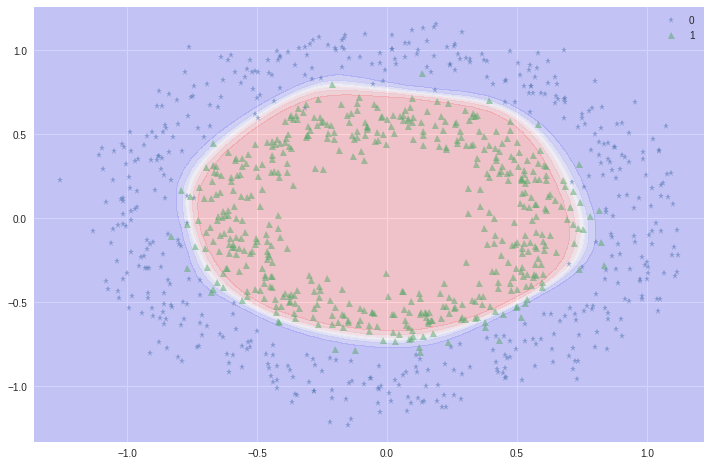

In [54]:
plot_decision_boundary(model, X, y)

# **Visualization**

In [17]:
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

model = Sequential()
model.add(Dense(4,input_shape=(2,),activation="tanh",name="Hidden-1"))
model.add(Dense(4,activation="tanh",name="Hidden-2"))
model.add(Dense(1,activation="sigmoid",name="Output"))
model.summary()

#Compile the model. Minimize Crossentropy for binary. Maximize for accuracy
#model.compile(Adam(lr=0.05),"binary_crossentropy",metrics=["accuracy"])
#Fit the model data with the data from make_blobs. Make 100 cycles through the data
#model.fit(X_train, y_train, epochs=100,verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden-1 (Dense)             (None, 4)                 12        
_________________________________________________________________
Hidden-2 (Dense)             (None, 4)                 20        
_________________________________________________________________
Output (Dense)               (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


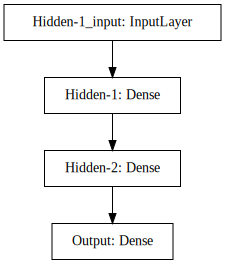

In [18]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

# **Callbacks Example**

In [16]:
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(4,input_shape=(2,),activation="tanh",name="Hidden-1"))
model.add(Dense(4,activation="tanh",name="Hidden-2"))
model.add(Dense(1,activation="sigmoid",name="Output"))

my_callbacks = [EarlyStopping(monitor='val_acc',patience=5,mode=max)]

#Compile the model. Minimize Crossentropy for binary. Maximize for accuracy
model.compile(Adam(lr=0.05),"binary_crossentropy",metrics=["accuracy"])
#Fit the model data with the data from make_blobs. Make 100 cycles through the data
model.fit(X_train, y_train, epochs=100,verbose=2,callbacks=my_callbacks,validation_data = (X_test, y_test))
#Get loss and accuracy on test data
eval_result = model.evaluate(X_test, y_test)
#Print Test Accuracy
print("\n\n Test Loss:", eval_result[0],"Test accuracy:",eval_result[1])

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:496: RuntimeWarning: EarlyStopping mode <built-in function max> is unknown, fallback to auto mode.
  RuntimeWarning)


Train on 700 samples, validate on 300 samples
Epoch 1/100
 - 0s - loss: 0.6954 - acc: 0.5729 - val_loss: 0.6947 - val_acc: 0.5200
Epoch 2/100
 - 0s - loss: 0.6727 - acc: 0.5871 - val_loss: 0.6633 - val_acc: 0.5567
Epoch 3/100
 - 0s - loss: 0.6162 - acc: 0.6700 - val_loss: 0.5694 - val_acc: 0.8000
Epoch 4/100
 - 0s - loss: 0.4432 - acc: 0.8729 - val_loss: 0.3785 - val_acc: 0.9133
Epoch 5/100
 - 0s - loss: 0.2662 - acc: 0.9529 - val_loss: 0.2468 - val_acc: 0.9467
Epoch 6/100
 - 0s - loss: 0.1756 - acc: 0.9657 - val_loss: 0.1953 - val_acc: 0.9333
Epoch 7/100
 - 0s - loss: 0.1366 - acc: 0.9614 - val_loss: 0.1614 - val_acc: 0.9400
Epoch 8/100
 - 0s - loss: 0.1058 - acc: 0.9643 - val_loss: 0.1554 - val_acc: 0.9467
Epoch 9/100
 - 0s - loss: 0.1106 - acc: 0.9543 - val_loss: 0.2310 - val_acc: 0.9233
Epoch 10/100
 - 0s - loss: 0.1096 - acc: 0.9514 - val_loss: 0.1732 - val_acc: 0.9267
300/300 [==============================] - 0s 54us/step


 Test Loss: 0.17317717507481575 Test accuracy: 0.926666